In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (1).csv


In [43]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [44]:
#usersDf =  pd.read_csv('users.csv', sep='__'  , engine='python')
data.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11142,52,admin.,divorced,secondary,no,48,no,yes,cellular,17,nov,591,1,-1,0,unknown,no
11143,38,unemployed,divorced,secondary,no,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no
11144,60,retired,married,secondary,no,0,yes,no,unknown,15,may,229,1,-1,0,unknown,no
11145,60,retired,divorced,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no
11146,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no
11147,44,unemployed,married,secondary,no,0,no,no,cellular,21,nov,175,4,-1,0,unknown,no
11148,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,-1,0,unknown,no
11149,46,entrepreneur,married,secondary,no,3317,no,no,cellular,19,nov,231,2,-1,0,unknown,no
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown,no
11151,40,management,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [45]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [46]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [47]:
data.shape

(11162, 17)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [49]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616d097cc0>,
      dtype=object)

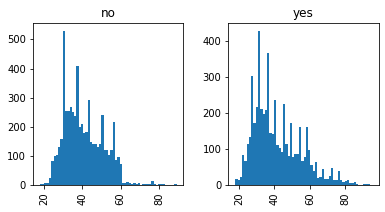

In [50]:
data.hist(column='age',by='deposit',bins=60,figsize=(6,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616ce91208>,
      dtype=object)

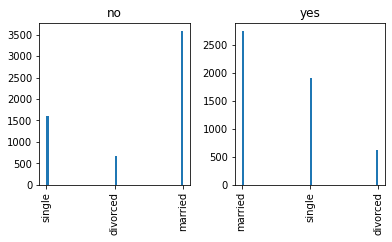

In [51]:
data.hist(column='marital',by='deposit',bins=60,figsize=(6,3))

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le2 = LabelEncoder()
data['deposit'] = le2.fit_transform(data['deposit'])

In [53]:
le1 = LabelEncoder()
data['marital'] = le2.fit_transform(data['marital'])

In [54]:
le3 = LabelEncoder()
data['job'] = le2.fit_transform(data['job'])

In [55]:
le4= LabelEncoder()
data['education'] = le2.fit_transform(data['education'])

le5= LabelEncoder()
data['month'] = le2.fit_transform(data['month'])

In [56]:
le6= LabelEncoder()
data['loan'] = le2.fit_transform(data['loan'])

In [57]:
le7= LabelEncoder()
data['contact'] = le2.fit_transform(data['contact'])

In [58]:
le8= LabelEncoder()
data['day'] = le2.fit_transform(data['day'])

le9= LabelEncoder()
data['poutcome'] = le2.fit_transform(data['poutcome'])

le10= LabelEncoder()
data['housing'] = le2.fit_transform(data['housing'])
le11= LabelEncoder()
data['default'] = le2.fit_transform(data['default'])


In [59]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,4,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,4,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,4,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,4,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,4,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,19,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,15,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,18,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,7,8,9,2,172,5,0,0


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = data['deposit']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [77]:
from sklearn.ensemble import RandomForestClassifier




In [78]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
clf = AdaBoostClassifier(
    RandomForestClassifier(max_depth=1),
    n_estimators=200
)

In [83]:
from sklearn.model_selection import cross_val_score
import statistics as s
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (s.mean(n_scores), s.stdev(n_scores)))

Accuracy: 0.829 (0.008)


In [79]:
clf.fit(X_train , y_train)
pred = clf.predict(X_test)
pred

array([0, 1, 0, ..., 1, 0, 0])

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1774
           1       0.82      0.82      0.82      1575

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

